## Introduction
In this notebook, I explore the data from the [**Inside Airbnb Project**](http://insideairbnb.com/)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# load data
listings_data = pd.read_csv("data/listings.csv.gz",compression='gzip',
                            header=0,sep=',',quotechar='"',error_bad_lines=False,
                           low_memory=False)

In [3]:
# total listings
listings_data.shape

(20432, 74)

In [4]:
# data overview
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20200830153825,2020-08-31,cafeheaven Pberg/Mitte,"Private, bright and friendly room. You'd be sh...",near all the trendy cafés and flea markets and...,https://a0.muscache.com/pictures/107924758/1f4...,2164,https://www.airbnb.com/users/show/2164,...,9.0,9.0,8.0,NaN,f,2,0,2,0,0.21
1,3176,https://www.airbnb.com/rooms/3176,20200830153825,2020-08-31,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,...,9.0,10.0,9.0,NaN,f,1,1,0,0,1.07
2,3309,https://www.airbnb.com/rooms/3309,20200830153825,2020-09-01,BerlinSpot Schöneberg near KaDeWe,First of all:<br />I prefer short-notice booki...,"My flat is in the middle of West-Berlin, direc...",https://a0.muscache.com/pictures/29054294/b1fa...,4108,https://www.airbnb.com/users/show/4108,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.31
3,7071,https://www.airbnb.com/rooms/7071,20200830153825,2020-08-31,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",https://a0.muscache.com/pictures/21278/32a1622...,17391,https://www.airbnb.com/users/show/17391,...,10.0,10.0,9.0,NaN,t,1,0,1,0,2.18
4,9991,https://www.airbnb.com/rooms/9991,20200830153825,2020-08-31,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,...,10.0,10.0,10.0,03/Z/RA/003410-18,f,1,1,0,0,0.13


In [5]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20432 entries, 0 to 20431
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20432 non-null  int64  
 1   listing_url                                   20432 non-null  object 
 2   scrape_id                                     20432 non-null  int64  
 3   last_scraped                                  20432 non-null  object 
 4   name                                          20400 non-null  object 
 5   description                                   19918 non-null  object 
 6   neighborhood_overview                         11186 non-null  object 
 7   picture_url                                   20432 non-null  object 
 8   host_id                                       20432 non-null  int64  
 9   host_url                                      20432 non-null 

In [6]:
# listings_data['bathrooms_text'].unique()

In [7]:
# check data columns
print([x for x in listings_data.columns])

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

In [8]:
# data summary
listings_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.043200e+04,2.043200e+04,2.043200e+04,20420.000000,20420.000000,20432.000000,20432.000000,20432.000000,0.0,18742.000000,...,16134.000000,16120.000000,16131.000000,16122.000000,16119.000000,20432.000000,20432.000000,20432.000000,20432.000000,16574.000000
mean,2.332114e+07,2.020083e+13,8.370147e+07,3.518805,3.518805,52.510082,13.405073,2.737177,NaN,1.266407,...,9.342878,9.742060,9.745459,9.613696,9.406849,2.778387,1.800607,0.708741,0.165916,0.872933
std,1.360409e+07,8.675994e+00,9.624043e+07,25.117581,25.117581,0.032100,0.062328,1.626837,NaN,0.621753,...,1.016055,0.683007,0.684740,0.729116,0.850242,6.329044,5.655676,1.294403,2.157332,1.259858
min,1.944000e+03,2.020083e+13,1.581000e+03,0.000000,0.000000,52.340480,13.097180,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.162008e+07,2.020083e+13,1.054162e+07,1.000000,1.000000,52.489620,13.368640,2.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.237021e+07,2.020083e+13,4.094528e+07,1.000000,1.000000,52.510100,13.414710,2.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.370000
75%,3.595554e+07,2.020083e+13,1.276706e+08,2.000000,2.000000,52.532960,13.439213,3.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.050000
max,4.519743e+07,2.020083e+13,3.648624e+08,1152.000000,1152.000000,52.656630,13.758420,16.000000,NaN,12.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,65.000000,65.000000,14.000000,38.000000,30.740000


In [9]:
# print([x for x in listings_data.columns if 'deposit' in x])

## 1. Data Processing

In [10]:
# let's take a look at prices
listings_data['price'].head()

0     $20.00
1     $90.00
2     $29.00
3     $45.00
4    $180.00
Name: price, dtype: object

In [11]:
# clean up price values
def clean_prices_column(df,col):
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.split('.',expand=True)[0]
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype(int,errors='ignore')
    return df

# apply function
listings_data = clean_prices_column(listings_data,'price')

# listings_data = clean_prices_column(listings_data,'weekly_price')
# listings_data = clean_prices_column(listings_data,'monthly_price')
# listings_data = clean_prices_column(listings_data,'security_deposit')
# listings_data = clean_prices_column(listings_data,'cleaning_fee')
# listings_data = clean_prices_column(listings_data,'extra_people')


In [12]:
listings_data['price'].describe()

count    20432.000000
mean        68.782694
std        111.290453
min          0.000000
25%         35.000000
50%         50.000000
75%         80.000000
max       8000.000000
Name: price, dtype: float64

- As shown below, most apartments cost less than $500

In [13]:
# check 90th percentile distribution
len(listings_data[listings_data['price']>listings_data['price'].quantile(0.9)])/len(listings_data)*100
len(listings_data[listings_data['price']>=500])

82

In [14]:
# create price distribution summary
price_dist = listings_data.groupby('price')['id'].count().rename('total').reset_index().sort_values(by='price',ascending=True)
price_dist.head()
# plot distribution
# fig,ax=plt.subplots(figsize=(8,6))
# sns.scatterplot('price','total',data=price_dist,ax=ax)
# plt.title("Berlin Airbnb Prices Distribution")
# plt.show()


,price,total
0,0,3
1,8,4
2,9,11
3,10,32
4,11,18


In [15]:
# check listings that cost more than $2500
listings_with_prices_above_2500 = listings_data[listings_data['price']>500]
print("Total of",listings_with_prices_above_2500.shape[0],"listings which is",
      str(round((listings_with_prices_above_2500.shape[0]/len(listings_data))*100,2))+"% of the dataset")

Total of 70 listings which is 0.34% of the dataset


- This is a small number and we can consider excluding them from the overall data
- I suspect the issue is using comma as a separator instead of dot for decimal values

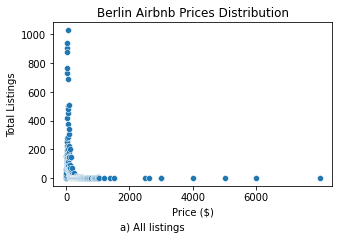

In [16]:
# Plot price distribution
fig,ax=plt.subplots(figsize=(5,3))
sns.scatterplot(x='price',y='total',data=price_dist,ax=ax)
plt.xlabel('Price ($)')
plt.xticks(np.arange(0,8000,2000)) # adjust labels
plt.ylabel('Total Listings')
plt.title("Berlin Airbnb Prices Distribution")
txt = 'a) All listings'
plt.figtext(0.4, -0.08, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

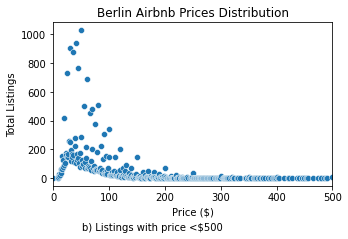

In [17]:
# Plot price limit to $500 max
fig,ax=plt.subplots(figsize=(5,3))
sns.scatterplot(x='price',y='total',data=price_dist,ax=ax)
plt.xlabel('Price ($)')
plt.xlim(0,500)
plt.ylabel('Total Listings')
plt.title("Berlin Airbnb Prices Distribution")
txt = 'b) Listings with price <$500'
plt.figtext(0.4, -0.08, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [18]:
# calculate distance in km from the city center
from math import radians,cos,sin,asin,sqrt

# define berlin center coordinates
center_lat = 52.521948
center_lon = 13.413698

# define harvesine function
def calculate_distance_from_city_center(df,lat,lon,center_lat,center_lon):
    """
    Calculates the great distance circle between
    two gps coordinates
    """
    # convert decimal degrees to radians
    df['lat1'] = df[lat].apply(lambda x : radians(x))
    df['lon1'] = df[lon].apply(lambda x : radians(x))
    lat2 = radians(center_lat)
    lon2 = radians(center_lon)
    
    # calculate harvesine distance
    df['dlat'] = lat2-df['lat1']
    df['dlon'] = lon2-df['lon1']
    
    df['sin_dlat'] = df['dlat'].apply(lambda x : sin(x/2)**2)
    df['cos_lat1'] = df['lat1'].apply(lambda x : cos(x))
    df['sin_dlon'] = df['dlon'].apply(lambda x : sin(x/2)**2)
    
    df['a'] = df['sin_dlat']+df['cos_lat1']*cos(lat2)*df['sin_dlon']
    df['distance'] = df['a'].apply(lambda x : round(2*asin(sqrt(x))*6371,3))
    
    # drop calculation columns
    df = df.drop(['sin_dlat','sin_dlon','cos_lat1','lat1','lon1','dlat','dlon','a'],axis=1)
    
    return df

# apply function
listings_data = calculate_distance_from_city_center(listings_data,
                                                               'latitude','longitude',center_lat,center_lon)

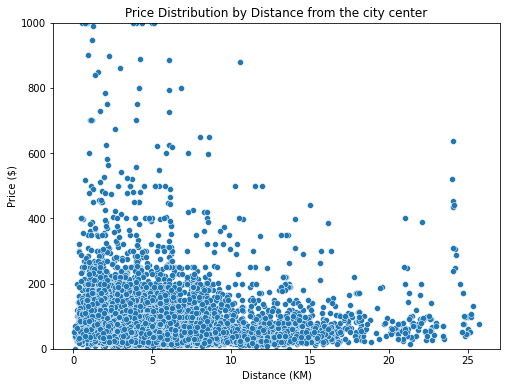

In [19]:
# plot price distribution against distance
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='distance',y='price',data=listings_data,ax=ax)
plt.title("Price Distribution by Distance from the city center")
plt.xlabel('Distance (KM)')
plt.ylabel('Price ($)')
plt.ylim(0,1000)
plt.show()

In general, prices are lower as you move away from the city center

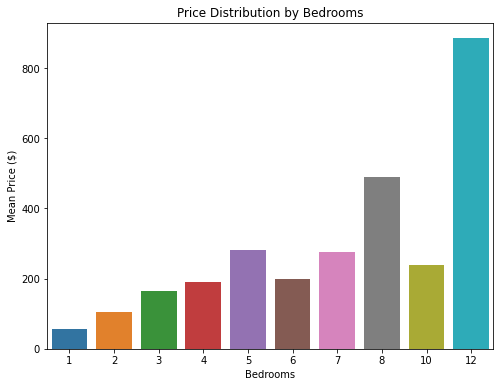

In [20]:
# plot price distribution against number of bedrooms
price_bed_dist = listings_data.groupby(['bedrooms'])['price'].mean().reset_index()
price_bed_dist['bedrooms']=price_bed_dist['bedrooms'].astype(int)

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='bedrooms',y='price',data=price_bed_dist,ax=ax)
plt.title("Price Distribution by Bedrooms")
plt.xlabel('Bedrooms')
plt.ylabel('Mean Price ($)')
plt.show()

In [21]:
listings_data[listings_data['bedrooms']==7]['price']

260       61
2690     153
5817     490
19613    400
Name: price, dtype: int64

There are one-bedroom apartments that are quite expensive, but there is no clear linear relationship between prices and the number of bedrooms

In the graph below, we look at apartments that cost less than $2000<br>
It seems cheaper to rent an apartments with more than 4 bedrooms

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


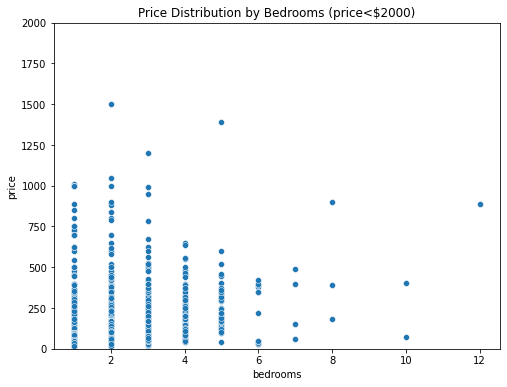

In [22]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('bedrooms','price',data=listings_data,ax=ax)
plt.ylim(0,2000)
plt.title("Price Distribution by Bedrooms (price<$2000)")
plt.show()

In [23]:
listings_data['accommodates'].unique()

array([ 1,  4,  2,  7,  5,  8,  3,  6, 14, 12,  9, 10, 16, 11, 15, 13,  0])

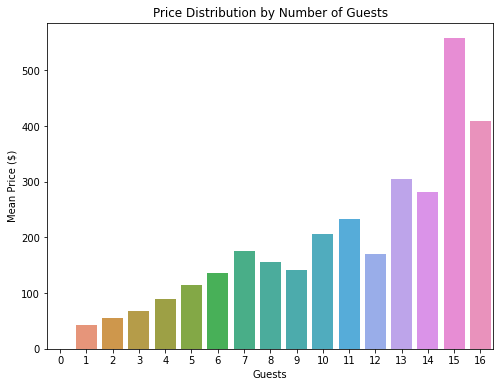

In [24]:
# number of guests
price_guest_dist = listings_data.groupby(['accommodates'])['price'].mean().reset_index()
price_guest_dist['accommodates']=price_guest_dist['accommodates'].astype(int)

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='accommodates',y='price',data=price_guest_dist,ax=ax)
plt.title("Price Distribution by Number of Guests")
plt.xlabel('Guests')
plt.ylabel('Mean Price ($)')
plt.show()
# price_guest_dist.head()

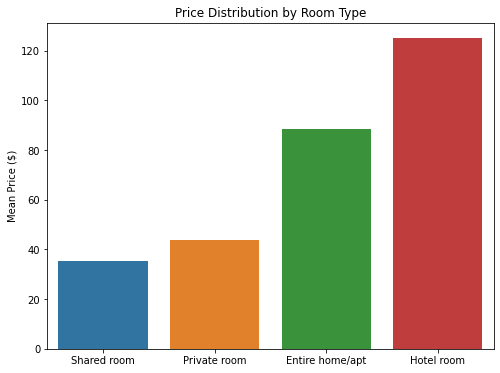

In [25]:
# average prices by room type
price_roomtype_dist = listings_data.groupby('room_type')['price'].mean().rename('price').reset_index().sort_values(by='price')

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='room_type',y='price',data=price_roomtype_dist,ax=ax)
plt.title("Price Distribution by Room Type")
plt.xlabel('')
plt.ylabel('Mean Price ($)')
plt.show()
# price_guest_dist.head()


It's cheaper to stay in a private room

In [26]:
# average prices by superhost
listings_data.groupby('host_is_superhost')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

,host_is_superhost,avg_price
0,f,66.553195
1,t,78.426864


You could save a few dollars by staying with non-superhost!

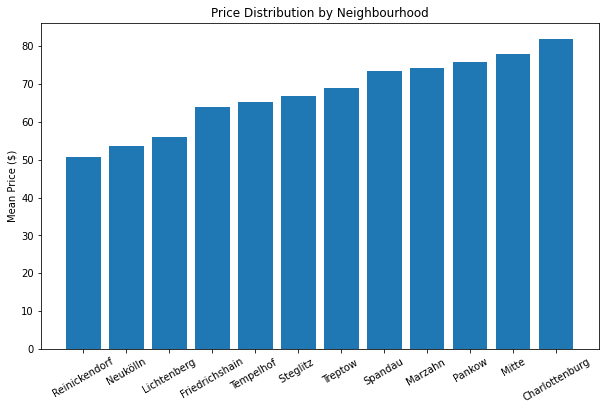

In [27]:
# how do these prices differ by neighbourhood?
neighborhood_group_summary = listings_data.groupby('neighbourhood_group_cleansed')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')
neighborhood_group_summary.columns = ['neighbourhood','avg_price']
# cleanup neighbourhood names
neighborhood_group_summary['neighbourhood'] = neighborhood_group_summary['neighbourhood'].str.split('-',expand=True)[0]

fig,ax = plt.subplots(figsize=(10,6))
plt.bar('neighbourhood','avg_price',data=neighborhood_group_summary)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('Mean Price ($)')
plt.title("Price Distribution by Neighbourhood")
plt.show()

In [28]:
# Distance Summary from city center
neighborhood_dist_summary = listings_data.groupby('neighbourhood_group_cleansed')['distance'].mean().rename('distance').reset_index().sort_values(by='distance')
neighborhood_dist_summary['neighbourhood_group_cleansed'] = neighborhood_dist_summary['neighbourhood_group_cleansed'].str.split('-',expand=True)[0]
neighborhood_dist_summary

,neighbourhood_group_cleansed,distance
6,Pankow,2.927991
4,Mitte,3.121449
1,Friedrichshain,3.172359
5,Neukölln,5.208431
2,Lichtenberg,5.930482
10,Tempelhof,6.190764
0,Charlottenburg,7.704026
7,Reinickendorf,9.042895
3,Marzahn,11.062181
11,Treptow,11.487626


- Charlettenburg-Wilmersdof borough has the most expensive airbnb apartments on average ($114)

- Reinickendorf apartments are the cheapest ($48)

In [29]:
# we can also check prices by neighbourhood
listings_data.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')[0:10]

,neighbourhood_group_cleansed,neighbourhood_cleansed,avg_price
35,Lichtenberg,Neu-Hohenschönhausen Süd,22.666667
40,Marzahn - Hellersdorf,Hellersdorf-Süd,29.750000
30,Lichtenberg,Friedrichsfelde Süd,30.324324
43,Marzahn - Hellersdorf,Marzahn-Mitte,33.333333
99,Spandau,Siemensstadt,33.857143
104,Steglitz - Zehlendorf,Lankwitz,37.192308
39,Marzahn - Hellersdorf,Hellersdorf-Ost,40.333333
86,Reinickendorf,Ost 1,41.854545
91,Reinickendorf,West 4,42.322581
132,Treptow - Köpenick,Niederschöneweide,42.360000


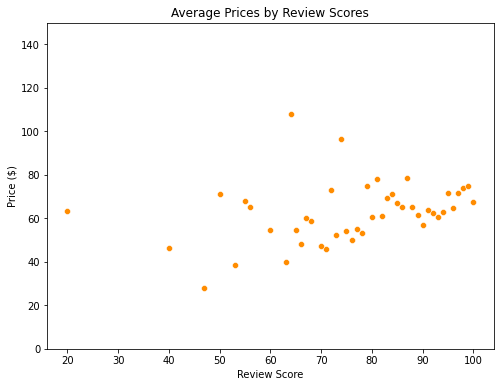

In [30]:
# plot average prices by review score rating
review_score_rating_sum = listings_data.groupby(['review_scores_rating'])['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

#plot distribution
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='review_scores_rating',y='avg_price',color='darkorange',data=review_score_rating_sum,ax=ax)
plt.ylim(0,150)
plt.title("Average Prices by Review Scores")
plt.ylabel('Price ($)')
plt.xlabel('Review Score')
plt.show()

- Apartments with high review score ratings are more expensive

## 2. Feature Selection

In [31]:
# check percentage of missing values by column
percent_missing_values = round((listings_data.isnull().sum()/len(listings_data))*100,2)
percent_missing_values = pd.DataFrame({"column_name":listings_data.columns,
                                     "%_missing_values":percent_missing_values})
percent_missing_values = percent_missing_values.reset_index(drop=True)
# sort by % of missing values
percent_missing_values = percent_missing_values.sort_values(by='%_missing_values',ascending=False)
# percent_missing_values.head(10)

print("Total columns:",len(percent_missing_values[percent_missing_values['%_missing_values']>30]))
columns_missing_more_than_30_pct_vals = [x for x in percent_missing_values[percent_missing_values['%_missing_values']>30]['column_name']]
print(columns_missing_more_than_30_pct_vals)

Total columns: 9
['calendar_updated', 'bathrooms', 'license', 'host_response_time', 'host_response_rate', 'host_about', 'neighborhood_overview', 'neighbourhood', 'host_acceptance_rate']


- We have 9 columns with more than 30% values missing
- We can drop these columns from our data

In [32]:
# drop columns with more than 30% missing values
reshaped_listings_data = listings_data.drop(columns_missing_more_than_30_pct_vals,axis=1)
reshaped_listings_data.shape

(20432, 66)

In [33]:
# columns missing between 5% & 30
cols_btn_1_and_30pct_missing_val = percent_missing_values[(percent_missing_values['%_missing_values']>=1) &
                                (percent_missing_values['%_missing_values']<=30)]
cols_btn_1_and_30pct_missing_val

,column_name,%_missing_values
20,host_neighbourhood,27.08
66,review_scores_value,21.11
63,review_scores_checkin,21.10
65,review_scores_location,21.09
64,review_scores_communication,21.05
62,review_scores_cleanliness,21.04
61,review_scores_accuracy,21.04
60,review_scores_rating,20.94
59,last_review,18.88
73,reviews_per_month,18.88


In [34]:
# check columns with missing data
cols_to_check =  [x for x in cols_btn_1_and_30pct_missing_val['column_name'].unique()]
listings_data[cols_to_check].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20432 entries, 0 to 20431
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_neighbourhood           14900 non-null  object 
 1   review_scores_value          16119 non-null  float64
 2   review_scores_checkin        16120 non-null  float64
 3   review_scores_location       16122 non-null  float64
 4   review_scores_communication  16131 non-null  float64
 5   review_scores_cleanliness    16134 non-null  float64
 6   review_scores_accuracy       16133 non-null  float64
 7   review_scores_rating         16153 non-null  float64
 8   last_review                  16574 non-null  object 
 9   reviews_per_month            16574 non-null  float64
 10  first_review                 16574 non-null  object 
 11  bedrooms                     18742 non-null  float64
 12  description                  19918 non-null  object 
 13  beds            

Keeping these columns for now so that we can impute the missing values

In [35]:
# drop listing where country code is not Germany
# we only have one
# reshaped_listings_data = reshaped_listings_data[reshaped_listings_data['country_code']=='DE']
print([x for x in reshaped_listings_data.columns])

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'revi

In [36]:
# let's define columns to drop
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name','first_review','last_review',
                   'description', 'picture_url', 'host_id', 'host_url','amenities',
                   'host_name', 'host_since','host_location','host_thumbnail_url',
                   'host_picture_url','host_verifications','host_has_profile_pic',
                   'host_identity_verified','calendar_last_scraped']

In [37]:
# drop the selected columns
reshaped_listings_data_clean = reshaped_listings_data.drop(columns_to_drop,axis=1)


# let's drop listings without prices
reshaped_listings_data_clean = reshaped_listings_data_clean[reshaped_listings_data_clean['price']>0]

reshaped_listings_data_clean = reshaped_listings_data_clean.copy()
print(reshaped_listings_data_clean.shape)
reshaped_listings_data_clean.head()

(20429, 46)


,id,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance
0,1944,f,Wedding,0.0,0.0,Brunnenstr. Nord,Mitte,52.54425,13.39749,Private room in apartment,...,9.0,9.0,8.0,f,2,0,2,0,0.21,2.711
1,3176,f,Prenzlauer Berg,1.0,1.0,Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,Entire apartment,...,9.0,10.0,9.0,f,1,1,0,0,1.07,1.475
2,3309,f,Schöneberg,1.0,1.0,Schöneberg-Nord,Tempelhof - Schöneberg,52.49885,13.34906,Private room in apartment,...,10.0,9.0,9.0,f,1,0,1,0,0.31,5.073
3,7071,t,Prenzlauer Berg,2.0,2.0,Helmholtzplatz,Pankow,52.54316,13.41509,Private room in apartment,...,10.0,10.0,9.0,t,1,0,1,0,2.18,2.361
4,9991,f,Prenzlauer Berg,1.0,1.0,Prenzlauer Berg Südwest,Pankow,52.53303,13.41605,Entire apartment,...,10.0,10.0,10.0,f,1,1,0,0,0.13,1.242


We now have 46 columns to work with

In [38]:
# # clean up zip code column
# reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10969\n10969','10969',reshaped_listings_data['zipcode'])
# reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10777 Berlin','10777',reshaped_listings_data['zipcode'])
# reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10997 Kreuzberg','10997',reshaped_listings_data['zipcode'])
# reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10119 Berlin','10119',reshaped_listings_data['zipcode'])
# reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='13359 Berlin','13359',reshaped_listings_data['zipcode'])
# reshaped_listings_data['zipcode'] = reshaped_listings_data['zipcode'].fillna(0).astype(int)
# # reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10997 Kreuzberg','10997',reshaped_listings_data['zipcode'])


In [39]:
# check our data values
reshaped_listings_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20429 entries, 0 to 20431
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20429 non-null  int64  
 1   host_is_superhost                             20417 non-null  object 
 2   host_neighbourhood                            14899 non-null  object 
 3   host_listings_count                           20417 non-null  float64
 4   host_total_listings_count                     20417 non-null  float64
 5   neighbourhood_cleansed                        20429 non-null  object 
 6   neighbourhood_group_cleansed                  20429 non-null  object 
 7   latitude                                      20429 non-null  float64
 8   longitude                                     20429 non-null  float64
 9   property_type                                 20429 non-null 

## Impute Missing Values

In [40]:
# create list of columns with integer & float values
int_or_float_cols = [x for x in reshaped_listings_data_clean.columns 
                     if reshaped_listings_data_clean[x].dtype==int or
                    reshaped_listings_data_clean[x].dtype==float]

# check percentage of missing values
int_or_float_data_df = reshaped_listings_data_clean[int_or_float_cols]

total_vals_missing = int_or_float_data_df.isnull().sum()
listings_int_values_df = pd.DataFrame({'column_name':int_or_float_data_df.columns,
                           'total_missing_vals':total_vals_missing})
listings_int_values_df = listings_int_values_df.reset_index(drop=True).sort_values('total_missing_vals',ascending=False)
listings_int_values_df['% missing values'] = round(listings_int_values_df['total_missing_vals']/len(reshaped_listings_data_clean)*100,2)
listings_int_values_df.head(10)

,column_name,total_missing_vals,% missing values
30,review_scores_value,4310,21.10
27,review_scores_checkin,4309,21.09
29,review_scores_location,4307,21.08
28,review_scores_communication,4298,21.04
25,review_scores_accuracy,4296,21.03
26,review_scores_cleanliness,4295,21.02
24,review_scores_rating,4276,20.93
35,reviews_per_month,3855,18.87
6,bedrooms,1687,8.26
7,beds,233,1.14


In [41]:
# Impute missing values 
# a) integer/float columns
for col in int_or_float_cols:
    median_val = round(np.median(reshaped_listings_data_clean[reshaped_listings_data_clean[col].isna()==False][col]),0)
    reshaped_listings_data_clean[col] = reshaped_listings_data_clean[col].fillna(median_val)

# b) categorical columns
categorical_cols_list = [x for x in reshaped_listings_data_clean.columns if reshaped_listings_data_clean[x].dtype==object]
for col in categorical_cols_list:
    reshaped_listings_data_clean[col] = reshaped_listings_data_clean[col].fillna("unknown")

In [42]:
# check if there are any columns missed
missing_vals_df = reshaped_listings_data_clean.isnull().sum().rename('total').reset_index().sort_values('total',ascending=False)
missing_vals_df[missing_vals_df['total']>0]

,index,total


### Check Multicollinearity in the Data

In [45]:
# impord module
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    # calculate VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [118]:
# create multicolinearity dataframe
filtered_df = reshaped_listings_data_clean#[reshaped_listings_data_clean['host_total_listings_count']>0]
filtered_df = filtered_df.copy()
filtered_df['host_listings_count'] = pd.to_numeric(filtered_df['host_listings_count'],errors='coerce').astype(int)
filtered_df['host_total_listings_count'] = pd.to_numeric(filtered_df['host_total_listings_count'],errors='coerce').astype(int)

filtered_df['host_total_listings_count'] = filtered_df['host_total_listings_count'].astype(int)
cols_with_int_vals = filtered_df[int_or_float_cols]

# remove some columns & check collinearity
drop_x_cols = ['id','host_listings_count','latitude','longitude','maximum_minimum_nights',
               'minimum_nights_avg_ntm','minimum_minimum_nights','calculated_host_listings_count',
               'maximum_nights_avg_ntm','host_total_listings_count','price']

cols_with_int_vals = cols_with_int_vals.drop(drop_x_cols,axis=1)
cols_with_int_vals.head()

# calculate collinearity
collinear_vals_df = calculate_vif(cols_with_int_vals)

In [119]:
collinear_vals_df = collinear_vals_df.sort_values('VIF',ascending=False)
collinear_vals_df['VIF'] = collinear_vals_df['VIF'].astype(int)
collinear_vals_df

,variables,VIF
14,review_scores_rating,615
18,review_scores_communication,509
17,review_scores_checkin,458
15,review_scores_accuracy,451
20,review_scores_value,346
19,review_scores_location,270
16,review_scores_cleanliness,201
8,availability_60,79
9,availability_90,50
7,availability_30,15


In [120]:
# select_cols = ['review_scores_rating','review_scores_location','review_scores_communication',
#                'review_scores_value','review_scores_cleanliness','review_scores_accuracy']
# reshaped_listings_data_clean[select_cols].head(15)

In [92]:
# x_df = reshaped_listings_data_clean[['host_total_listings_count','host_listings_count']]
# x_df[x_df['host_total_listings_count']>20].tail(10)

## Encode Categorical Data

In [121]:
# Let'ts look at the new potential dimension
categorical_cols = [x for x in reshaped_listings_data_clean.columns if reshaped_listings_data_clean[x].dtype==object]

# check unique values for each category
for x in categorical_cols:
    print(x,":",reshaped_listings_data_clean[x].nunique())

host_is_superhost : 3
host_neighbourhood : 173
neighbourhood_cleansed : 137
neighbourhood_group_cleansed : 12
property_type : 66
room_type : 4
bathrooms_text : 28
has_availability : 2
instant_bookable : 2


In [122]:
# create a list of categorical columns to encode
columns_to_encode = [x for x in reshaped_listings_data_clean.columns if reshaped_listings_data_clean[x].dtype==object and x !='id']

# use one-hot-encoding
encoded_listings_data = pd.get_dummies(reshaped_listings_data_clean,
                                       columns=columns_to_encode,
                                      drop_first=True)


In [123]:
# check shape of new dataset
encoded_listings_data.shape

(20429, 455)

In [124]:
# overview of the data we encoded
encoded_listings_data.head()

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,bathrooms_text_7 baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_8.5 shared baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,bathrooms_text_unknown,has_availability_t,instant_bookable_t
0,1944,0.0,0.0,52.54425,13.39749,1,1.0,1.0,20,60,...,0,0,0,0,0,0,0,0,1,0
1,3176,1.0,1.0,52.53500,13.41758,4,1.0,2.0,90,62,...,0,0,0,0,0,0,0,0,1,0
2,3309,1.0,1.0,52.49885,13.34906,1,1.0,1.0,29,7,...,0,0,0,0,0,0,0,0,1,0
3,7071,2.0,2.0,52.54316,13.41509,2,1.0,2.0,45,1,...,0,0,0,0,0,0,0,0,1,1
4,9991,1.0,1.0,52.53303,13.41605,7,4.0,7.0,180,6,...,0,0,0,0,0,0,0,0,1,0


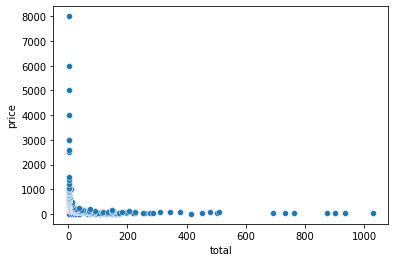

In [46]:
x_sum = encoded_listings_data.groupby('price')['id'].count().rename('total').reset_index()

sns.scatterplot(y='price',x='total',data=x_sum)
plt.show()

## 2.1 Feature Importance

First we find the most important features for our model

In [125]:
# let's drop some columns to avoid collinearity
drop_cols = ['host_listings_count','latitude','longitude',
             'host_total_listings_count','minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm']
encoded_listings_data = encoded_listings_data.drop(drop_cols,axis=1)

In [126]:
# Create first model using random forest regressor

# prepare data for model
X = encoded_listings_data.drop(['id','price'],axis=1)
y = encoded_listings_data['price']

# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# fit the model
model = RandomForestRegressor(n_estimators=2000,n_jobs=-1)
model.fit(X_train,y_train)

# get feature importance
feat_importances = model.feature_importances_
col_list = [x for x in X_train.columns]
feat_list = {}
for i,v in enumerate(feat_importances):
    feat_list[col_list[i]]=v

# create feature importance dataframe
feature_importances_df = pd.DataFrame(feat_list.items(),columns=['feature','score'])
feature_importances_df = feature_importances_df.sort_values('score',ascending=False)

# create a list of top 50 features
# top_50_features_list = [x for x in feature_importances_df[:50]['feature']]
# top_50_features_list = [x for x in feature_importances_df['feature']]

feature_importances_df.head(15)

,feature,score
12,availability_365,0.140100
0,accommodates,0.124796
28,distance,0.065273
1,bedrooms,0.064279
323,neighbourhood_cleansed_Volkspark Wilmersdorf,0.044339
229,neighbourhood_cleansed_Düsseldorfer Straße,0.041930
18,review_scores_cleanliness,0.034635
430,bathrooms_text_3.5 baths,0.028409
27,reviews_per_month,0.024863
22,review_scores_value,0.021790


In [127]:
# save features
feature_importances_df.to_csv('trained_models/feature_importances1.csv')

In [128]:
feature_importances_df.shape

(447, 2)

## 3. Modeling

In [388]:
# find the best number of features
def return_best_features(df,features_df):
    feature_scores = {}
    for n in range(5,205,5):
        print("Training Model with ",n," features")
        top_n_features = [x for x in features_df[:n]['feature']]

        # define data
        X = df[top_n_features]
        y = df['price']

        # split data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

        # create model
        model = RandomForestRegressor(n_jobs=-1)

        # train model
        model.fit(X_train,y_train)

        # make predictions
        y_pred = model.predict(X_test)
        y_pred = np.round(y_pred,0)

        model_scores = {}
        # calculate model accuracy
        r_sq = "{0:.4}".format(model.score(X_test,y_test))
        rmse = "{0:.4}".format((mean_squared_error(y_test,y_pred)**(0.5)))
        mae = "{0:.4}".format(mean_absolute_error(y_test,y_pred))

        # add scores to dictionary
        model_scores["r_sq"] = r_sq
        model_scores["rmse"] = rmse
        model_scores["mae"] = mae
        feature_scores[n] = model_scores

    # create dataframe with scores
    feature_scores_df = pd.DataFrame(list(feature_scores.items()),columns=['n_features','scores'])
    feature_scores_val = pd.DataFrame(feature_scores_df['scores'].values.tolist()) # cleanup features
    features_scores_final = pd.concat([feature_scores_df['n_features'],feature_scores_val],axis=1)

    
    return features_scores_final


In [397]:
# n_feature_scores = return_best_features(encoded_listings_data,feature_importances_df)


In [398]:
# save csv file
n_feature_scores.to_csv("trained_models/top_200_features_scores.csv",index=False)

#clean up int values
n_feature_scores_df = n_feature_scores
n_feature_scores_df = n_feature_scores.astype(float)
n_feature_scores_df.head(10)


,n_features,r_sq,rmse,mae
0,5.0,-0.27790,145.5,33.38
1,10.0,-0.14870,138.0,31.12
2,15.0,-0.13070,136.9,28.13
3,20.0,-0.12000,136.2,27.94
4,25.0,-0.12700,136.7,27.96
5,30.0,-0.09955,135.0,26.56
6,35.0,-0.07278,133.3,26.48
7,40.0,-0.07001,133.2,26.22
8,45.0,-0.07214,133.3,25.98
9,50.0,-0.06771,133.0,26.03


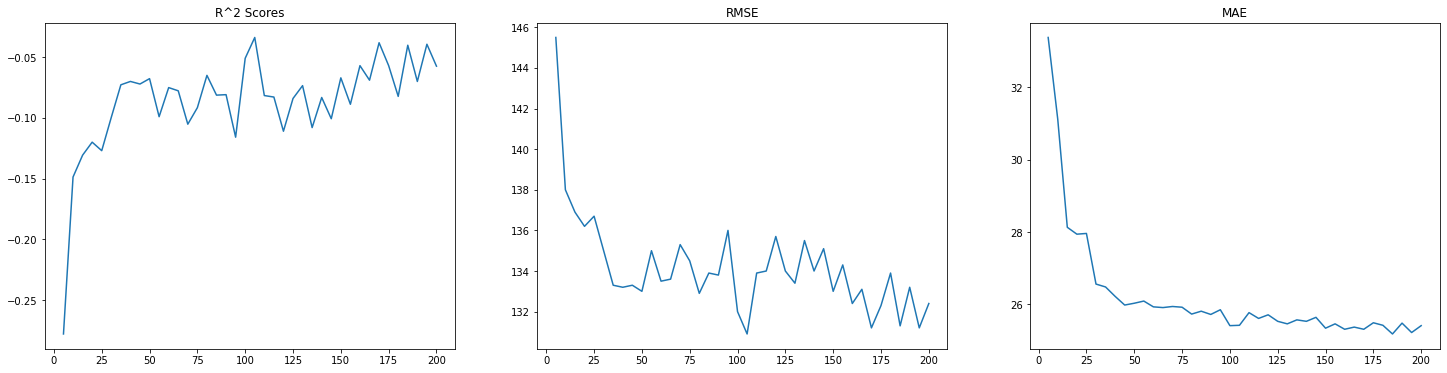

In [394]:
# plot the results
fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(25,6))
ax1.plot('n_features','r_sq',data=n_feature_scores_df)
ax1.set_title("R^2 Scores")
ax2.plot('n_features','rmse',data=n_feature_scores_df)
ax2.set_title("RMSE")
ax3.plot('n_features','mae',data=n_feature_scores_df)
ax3.set_title("MAE")
plt.show()

-The model achieves the best scores at 185 features

In [399]:
# prepare data fro modeling
n = 185
top_n_features_list = [x for x in feature_importances_df[:n]['feature']]
X = encoded_listings_data[top_n_features_list]
y = encoded_listings_data['price']

# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# create a model
rf_model = RandomForestRegressor(n_estimators=2000,n_jobs=-1)
rf_model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=2000, n_jobs=-1)

In [401]:
# save model
import os
import time
import pickle
import joblib
# save model
model_name = 'trained_models/rf_trained_model_v1.pkl'

start = time.time()
with open(model_name, 'wb') as f:
    joblib.dump(rf_model, f,compress=3)
raw_dump_duration = time.time() - start
print("Raw dump duration: %0.3fs" % raw_dump_duration)

Raw dump duration: 77.783s


In [402]:
# load model
%timeit saved_model = joblib.load(model_name)

34.2 s ± 932 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [404]:
# make predictions with the model
y_pred = rf_model.predict(X_test)
y_pred = np.round(y_pred,0)
# get R^2 score
model_score = rf_model.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R^2:","{0:.4}".format(model_score))
print("mse","{0:.4}".format(mse))
print("RMSE:","{0:.4}".format(mse**(1/2)))
print("MAE","{0:.4}".format(mae))

R^2: -0.0674
mse 1.769e+04
RMSE: 133.0
MAE 25.24


The model returned an R^2 score of -6.7% and RMSE of 133.0. These do not look great and they could have possibly been affected by outliers.
The MAE error is however low at 25.4. We can try to optimize this value for better results

Looking at predictions below, the model is doing relatively ok

In [410]:
# check prediction variance
y_pred_df = pd.DataFrame(y_pred,columns=['predicted']).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
prediction_results = pd.concat([y_test_df,y_pred_df],axis=1)
prediction_results['predicted'] = round(prediction_results['predicted'],0)
prediction_results['error'] = prediction_results['predicted'] - prediction_results['price']

prediction_results.head(15)

,price,predicted,error
0,25,30.0,5.0
1,50,74.0,24.0
2,45,54.0,9.0
3,72,78.0,6.0
4,36,64.0,28.0
5,67,56.0,-11.0
6,31,39.0,8.0
7,150,180.0,30.0
8,25,32.0,7.0
9,70,69.0,-1.0


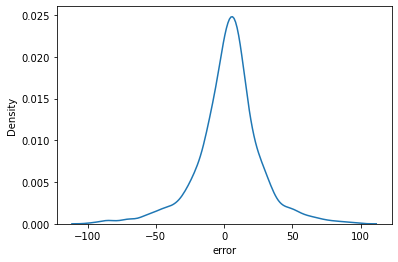

In [421]:
# let's plot error distribution density
# without outliers
no_outliers_df = prediction_results[(prediction_results['error']<100) &
                                   (prediction_results['error']>-100)]

sns.kdeplot(no_outliers_df['error'])
plt.show()

Looking at the distribution above, we can see that our model errors are centered arount $1 which means on average our model is performing decently

- Also looking at the summary below, the 75% of our errors were $15 or less

In [422]:
prediction_results.describe()

,price,predicted,error
count,6129.000000,6129.000000,6129.000000
mean,68.701909,70.106053,1.404144
std,128.742405,74.742125,133.001735
min,8.000000,13.000000,-7944.000000
25%,35.000000,39.000000,-8.000000
50%,50.000000,58.000000,4.000000
75%,80.000000,81.000000,15.000000
max,8000.000000,2740.000000,2331.000000


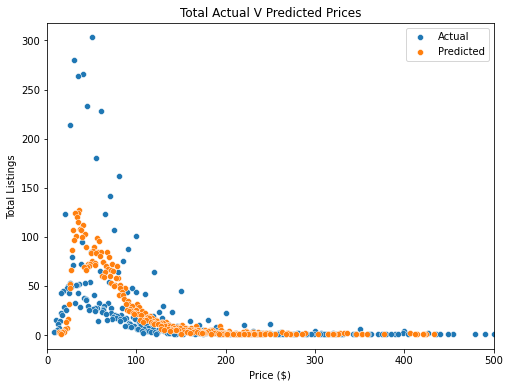

In [407]:
# plot the distributions
actual_prices_df=prediction_results['price'].value_counts().rename('total').reset_index()
actual_prices_df.columns = ['price','total']
predicted_prices_df=prediction_results['predicted'].value_counts().rename('total').reset_index()
predicted_prices_df.columns = ['predicted','total']

# plot the distributions
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='price',y='total',data=actual_prices_df,label='Actual',ax=ax)
sns.scatterplot(x='predicted',y='total',data=predicted_prices_df,label='Predicted',ax=ax)
plt.xlim(0,500)
plt.xlabel("Price ($)")
plt.ylabel("Total Listings")
plt.title('Total Actual V Predicted Prices')
plt.show()

## Hyperparameter Tuning

In [423]:
# define parameters to optimize
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

 # define search grid
random_grid = {
     'n_estimators': n_estimators,
     'max_features': max_features,
     'max_depth': max_depth,
     'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap
    }

In [435]:
from sklearn.model_selection import RandomizedSearchCV
# find best hyperparameters
rf_model = RandomForestRegressor()
# search using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid,
                               n_iter=50,cv=3,verbose=0,random_state=42,n_jobs=-1)
# fit the random search
rf_random.fit(X_train,y_train)


In [429]:
# open saved model
hyperparam_model = 'trained_models/rf_hypermodel_model_v1.pkl'
with open(hyperparam_model,'wb') as f:
    joblib.dump(rf_random,f,compress=3)

In [430]:
# check best parameters
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [431]:
hyperparams_file = 'trained_models/best_params.json'
with open(hyperparams_file,'wb') as f:
    joblib.dump(rf_random.best_params_,f)

In [432]:
best_params = joblib.load(hyperparams_file)
best_params

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [433]:
# use best features to train the model
n_estimators = rf_random.best_params_['n_estimators']
max_depth = rf_random.best_params_['max_depth']
min_samples_split = rf_random.best_params_['min_samples_split']
min_samples_leaf = rf_random.best_params_['min_samples_leaf']
bootstrap = rf_random.best_params_['bootstrap']

# train the model with hyperparameters
hyper_model_name = "trained_models/rf_hypermodel_final_v1.pkl"

# fit model with
hyper_model = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    bootstrap=bootstrap,verbose=0,
                                    n_jobs=-1,random_state=42)
hyper_model.fit(X_train,y_train)

# save model
with open(hyper_model_name,'wb') as f:
    joblib.dump(hyper_model,f,compress=3)

In [434]:
# make predictions with the hyperparameter model
y_pred = hyper_model.predict(X_test)

# get model socre
r2_score = hyper_model.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R^2:",r2_score)
print("MSE:",mse)
print("RMSE:",mse**(0.5))
print("MAE:",mae)

R^2: -0.6295673949126588
MSE: 27005.031976409762
RMSE: 164.33207835480496
MAE: 33.83088334926075


In [436]:
# check prediction results
y_pred_df = pd.DataFrame(y_pred,columns=['predicted']).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
prediction_results = pd.concat([y_test_df,y_pred_df],axis=1)
prediction_results['predicted'] = round(prediction_results['predicted'],0)
prediction_results['error'] = prediction_results['predicted'] - prediction_results['price']

prediction_results.head(15)

,price,predicted,error
0,25,24.0,-1.0
1,50,47.0,-3.0
2,45,47.0,2.0
3,72,70.0,-2.0
4,36,84.0,48.0
5,67,47.0,-20.0
6,31,46.0,15.0
7,150,255.0,105.0
8,25,25.0,0.0
9,70,66.0,-4.0


In [437]:
prediction_results.describe()

,price,predicted,error
count,6129.000000,6129.000000,6129.000000
mean,68.701909,71.814815,3.112906
std,128.742405,124.746450,164.319871
min,8.000000,10.000000,-7944.000000
25%,35.000000,36.000000,-14.000000
50%,50.000000,53.000000,1.000000
75%,80.000000,80.000000,16.000000
max,8000.000000,4500.000000,4430.000000
